In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [2]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
mi_rcb=matches[((matches.team1=='Mumbai Indians') | (matches.team2=='Mumbai Indians')) & ((matches.team1=='Royal Challengers Bangalore') | (matches.team2=='Royal Challengers Bangalore'))]
mi=matches[(matches.team1=='Mumbai Indians') | (matches.team2=='Mumbai Indians')]
rcb=matches[(matches.team1=='Royal Challengers Bangalore') | (matches.team2=='Royal Challengers Bangalore')]
mi_rcb.shape,mi.shape,rcb.shape

((25, 18), (187, 18), (180, 18))

In [5]:
mi_rcbdeli=deliveries[((deliveries.batting_team=='Mumbai Indians') | (deliveries.bowling_team=='Mumbai Indians')) & ((deliveries.batting_team=='Royal Challengers Bangalore') | (deliveries.bowling_team=='Royal Challengers Bangalore'))]
mideli=deliveries[(deliveries.batting_team=='Mumbai Indians') | (deliveries.bowling_team=='Mumbai Indians')]
rcbdeli=deliveries[(deliveries.batting_team=='Royal Challengers Bangalore') | (deliveries.bowling_team=='Royal Challengers Bangalore')]
mi_rcbdeli.shape,mideli.shape,rcbdeli.shape

((6124, 21), (45136, 21), (42144, 21))

# Q1

In [6]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='Darkblue')
        ax[i].set_title(columns[i])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

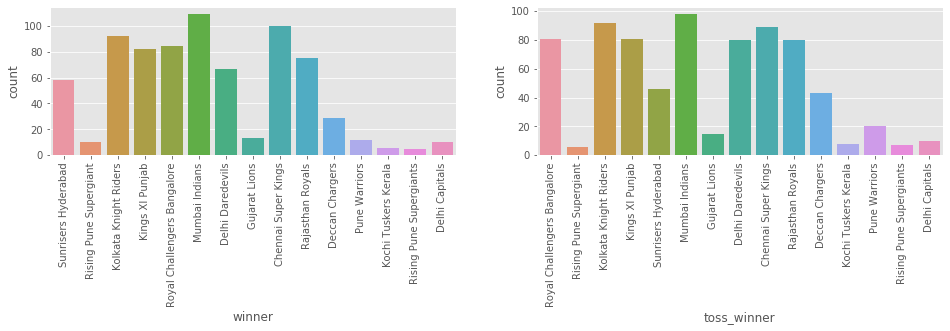

In [7]:
fig=plt.figure(figsize=(16,6))
fig.add_subplot(221)
for i in sns.countplot(matches.winner).get_xticklabels():
    i.set_rotation(90)
    
    
    
fig.add_subplot(222)
sns.countplot(matches.toss_winner)
plt.xticks(rotation=90)

In [8]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],autopct='%2.f%%',colors=['skyblue','crimson'])
        ax[i].set_title(columns[i])

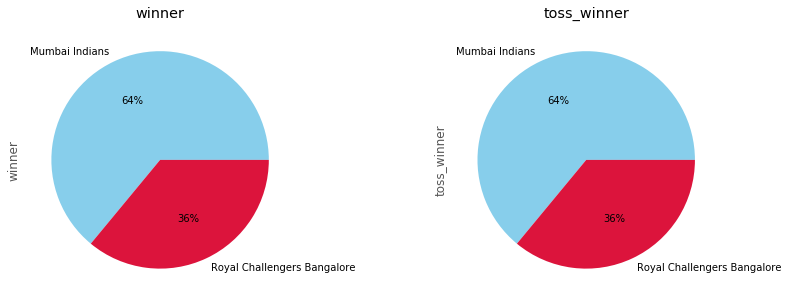

In [9]:
cat_plot(mi_rcb,['winner','toss_winner'],(14,5),'pie')


### It's pretty awkward that the toss winner and winner % are matching up perfectly, eitherway we can observe really well that MI is likely to win the match.

# Q2

In [10]:
bowler_wickets=mi_rcbdeli.groupby(['match_id','bowler'],as_index=False).player_dismissed.count()
bowler_wickets=bowler_wickets[bowler_wickets.player_dismissed.map(lambda x:x>=2)]

bowler_wickets

,match_id,bowler,player_dismissed
4,12,MJ McClenaghan,2
7,12,S Badree,4
16,37,KH Pandya,2
18,37,MJ McClenaghan,4
19,37,P Negi,3
...,...,...,...
277,11143,UT Yadav,2
278,11143,YS Chahal,4
283,11322,M Ali,2
288,11322,SL Malinga,5


Text(0.5, 1.0, 'Distribution of bowlers who has taken greater than or equal to 2 wickets')

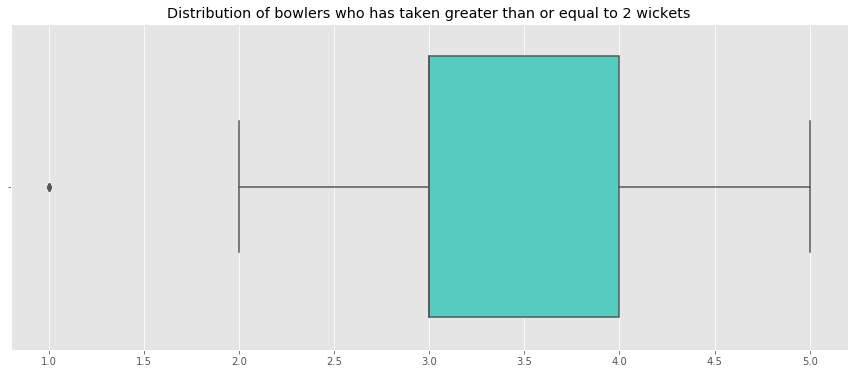

In [11]:
plt.figure(figsize=(15,6))
sns.boxplot(bowler_wickets.pivot_table(index='match_id',aggfunc='count'),color='turquoise')


plt.title('Distribution of bowlers who has taken greater than or equal to 2 wickets')

### It can be clearly observed that in the above diagram that there will be around 3-4 such bowlers who will take more than or equal to 2 wickets

# Q3

#### Economy Rate Formula:
- ((total_runs-(bye_runs+legbye_runs))/Number of balls bowled)*6

In [12]:
eco_rate=mi_rcbdeli.pivot_table(index=['match_id','bowler',],aggfunc=['count','sum'])
eco_rate=eco_rate[eco_rate['count','over']>1]['sum'][['total_runs','legbye_runs','bye_runs']]

eco_rate['ball_count']=mi_rcbdeli.groupby(['match_id','bowler']).ball.count()
eco_rate

total_runs  legbye_runs  bye_runs  ball_count
match_id bowler                                                        
12       HH Pandya                 9            0         0          12
         Harbhajan Singh          25            2         0          24
         JJ Bumrah                40            1         0          25
         KH Pandya                25            0         4          24
         MJ McClenaghan           20            0         0          25
...                              ...          ...       ...         ...
11322    P Negi                   50            0         0          27
         RD Chahar                31            0         0          24
         SL Malinga               35            0         2          24
         UT Yadav                 26            0         0          13
         YS Chahal                27            0         0          24

[291 rows x 4 columns]

In [13]:
eco_rate['bowler_eco_rate']=((eco_rate.total_runs-(eco_rate.bye_runs+eco_rate.legbye_runs))/eco_rate.ball_count)*6
eco_rate

total_runs  legbye_runs  bye_runs  ball_count  \
match_id bowler                                                           
12       HH Pandya                 9            0         0          12   
         Harbhajan Singh          25            2         0          24   
         JJ Bumrah                40            1         0          25   
         KH Pandya                25            0         4          24   
         MJ McClenaghan           20            0         0          25   
...                              ...          ...       ...         ...   
11322    P Negi                   50            0         0          27   
         RD Chahar                31            0         0          24   
         SL Malinga               35            0         2          24   
         UT Yadav                 26            0         0          13   
         YS Chahal                27            0         0          24   

                          bowler_eco_rate  
match_id bowler                            
12       HH Pandya               4.500000  
         Harbhajan Singh         5.750000  
         JJ Bumrah               9.360000  
         KH Pandya               5.250000  
         MJ McClenaghan          4.800000  
...                                   ...  
11322    P Negi                 11.111111  
         RD Chahar               7.750000  
         SL Malinga              8.250000  
         UT Yadav               12.000000  
         YS Chahal               6.750000  

[291 rows x 5 columns]

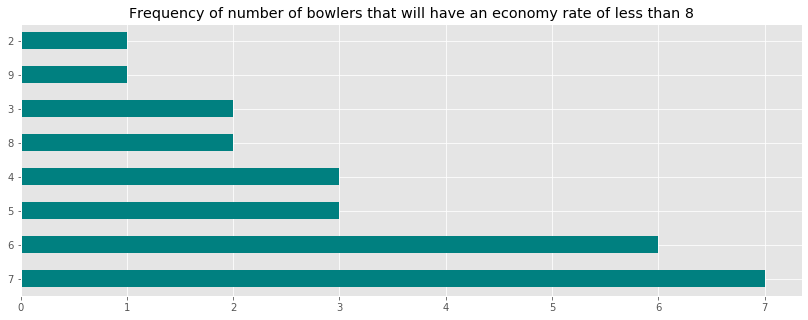

In [14]:
ecorate_lessthan8=eco_rate.query('bowler_eco_rate<8').pivot_table(index='match_id',
                                                                  aggfunc='count').bowler_eco_rate
ecorate_lessthan8.value_counts().plot.barh(figsize=(14,5),
                                           color='teal',
                                           title='Frequency of number of bowlers that will have an economy rate of less than 8')

### From the above analysis we can infer that there will be 5-7 such bowlers in the match who will have an economy rate of less than 8

# Q4

#### Strike Rate Formula
- (batsman_runs/balls_he_faced)*100

In [15]:
batsman_strike=mi_rcbdeli.groupby(['match_id',
                                   'batsman',
                                   ]).agg({'batsman_runs':'sum','ball':'count'})

# boundaries[(boundaries['sum'].query('batsman_runs>=4')) & (boundaries['count'].groupby(['match_id','batsman']).sum().ball>10)]
batsman_strike

batsman_runs  ball
match_id batsman                           
12       AB de Villiers            19    22
         CH Gayle                  22    28
         HH Pandya                  9     5
         JC Buttler                 2     5
         KA Pollard                70    49
...                               ...   ...
11322    PA Patel                  31    20
         Q de Kock                 41    27
         RG Sharma                 29    20
         UT Yadav                   2     1
         V Kohli                    9    10

[365 rows x 2 columns]

In [16]:
batsman_strike['strike_rate']=((batsman_strike.batsman_runs/batsman_strike.ball)*100)

Text(0.5, 1.0, 'Distribution of number of batsman who will have strike rate of greater than 130 and will hit more than 3 boundaries')

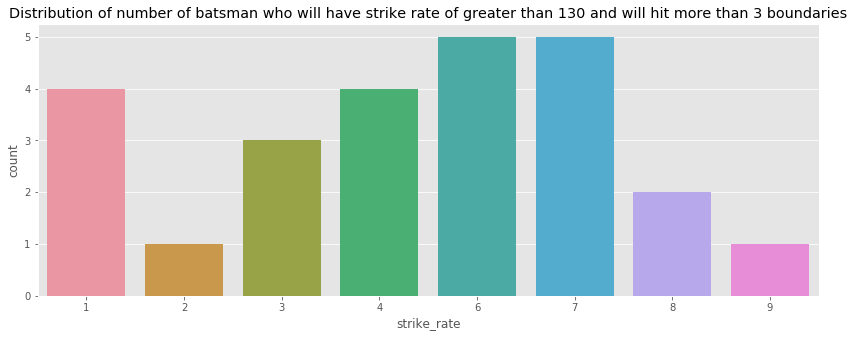

In [17]:
plt.figure(figsize=(14,5))
sns.countplot(batsman_strike.query('strike_rate>130').groupby('match_id').count().strike_rate)
plt.title('Distribution of number of batsman who will have strike rate of greater than 130 and will hit more than 3 boundaries')

### As we can infer from above there will be around 4-7 such batsmen

# Q5

In [18]:
rcb_6score=mi_rcbdeli.query('batting_team=="Royal Challengers Bangalore" & over<=6').groupby('match_id').total_runs.sum()
mi_6score=mi_rcbdeli.query('batting_team=="Mumbai Indians" & over<=6').groupby('match_id').total_runs.sum()


In [19]:
print('Royal Challengers Bangalore \n\n',rcb_6score.describe(),'\n\n\n Mumbai Indians \n\n',mi_6score.describe())

Royal Challengers Bangalore 

 count    25.000000
mean     43.040000
std      11.791522
min      24.000000
25%      35.000000
50%      40.000000
75%      51.000000
max      68.000000
Name: total_runs, dtype: float64 


 Mumbai Indians 

 count    25.000000
mean     45.000000
std      12.048513
min      21.000000
25%      39.000000
50%      46.000000
75%      52.000000
max      71.000000
Name: total_runs, dtype: float64


(-30, 25)

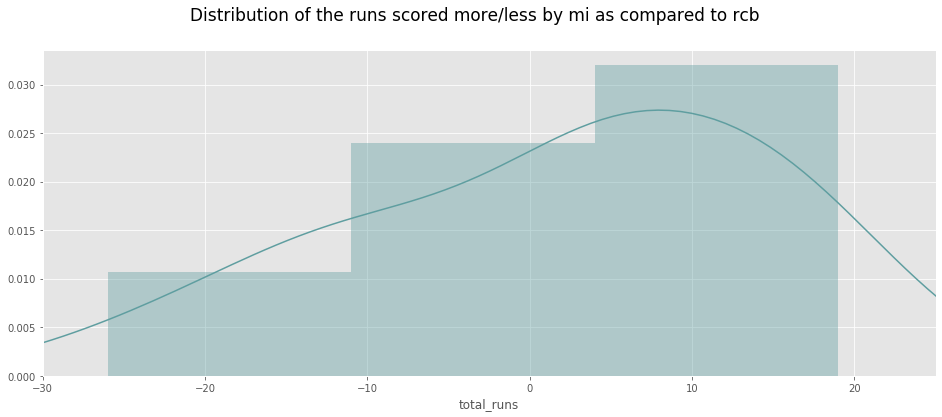

In [20]:
plt.figure(figsize=(16,6)).suptitle('Distribution of the runs scored more/less by mi as compared to rcb',fontsize=17)
sns.distplot(mi_6score-rcb_6score,color='cadetblue')
plt.xlim([-30,25])


### From the above distribution and central tendency measures we can assume that mi will score around 5-18 runs more than rcb in the 1st 6 overs